In [1]:
#1. Import the libraries and the tools from the libraries

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#2. Import Dataset

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print(y_train_raw[0])

print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

11501568/11490434 [==============================] - 0s 0us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
x_train_raw[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train_raw[1]

0

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
y_test.shape

(10000, 10)

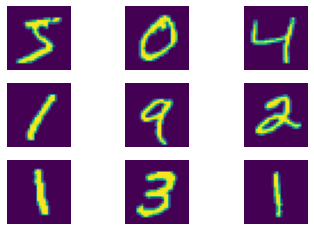

In [8]:
plt.figure()

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i])
  plt.axis('off')
plt.show()

In [9]:
y_train_raw[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

1

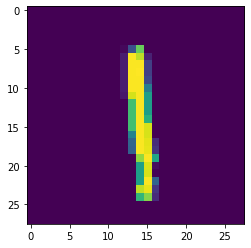

In [10]:
plt.imshow(x_train_raw[i])
y_train_raw[i]

In [11]:
#4. Preprocess the data

x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

print(x_train_raw.shape)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [12]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train.dtype

dtype('float32')

# DNN

In [14]:
#5. Build a DNN model that consist of 3 fully connected layers

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_dim = 784),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [15]:
(784*256) + 256

200960

In [16]:
(256*64) + 64

16448

In [17]:
(64*10) + 10

650

In [18]:
#6. Compile the model before the model can run

Optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])

In [19]:
60000/128

468.75

In [20]:
#7. Train the model

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.2875 - accuracy: 0.9183
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1091 - accuracy: 0.9676
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0703 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0383 - accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0141 - accuracy: 0.995

In [21]:
#8. Evaluate the model

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9795
Test loss: 0.07929670810699463
Test accuracy: 0.9794999957084656


# CNN

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.Sequential()

model.add(keras.layers.Conv2D(filters=16,kernel_size = 5,strides = (1,1),
                              padding = 'valid',activation = tf.nn.relu,input_shape = (28,28,1)))

model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(keras.layers.Conv2D(filters=32,kernel_size = 3,strides = (1,1),
                              padding = 'valid', activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=64,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))


In [23]:
((5*5*1)*16)+16

416

In [24]:
((3*3*16)*32)+32

4640

In [25]:
(800*128)+128

102528

In [26]:
(128*64)+64

8256

In [27]:
(64*10)+10

650

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)              

In [29]:
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=3,batch_size=128)

Epoch 1/3
469/469 [==============================] - 34s 70ms/step - loss: 0.3375 - accuracy: 0.8930
Epoch 2/3
469/469 [==============================] - 28s 59ms/step - loss: 0.0933 - accuracy: 0.9717
Epoch 3/3
469/469 [==============================] - 29s 62ms/step - loss: 0.0697 - accuracy: 0.9787


In [30]:
test_loss, test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("Test Accuracy %.2f"%test_acc)

79/79 [==============================] - 2s 18ms/step - loss: 0.0364 - accuracy: 0.9876
Test Accuracy 0.99


In [31]:
model.save(r'final_CNN_Model.h5')

prediction results of the first 25 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
9,6,6,5,4,	
first 25 images in the test set:


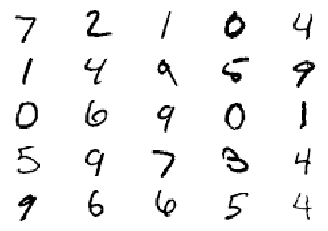

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

new_model = tf.keras.models.load_model('final_CNN_Model.h5')

def res_Visual(n):
  final_opt_a = np.argmax(new_model.predict(X_test[0:n]), axis=-1)

  fig, ax = plt.subplots(nrows=int(n/5),ncols=5)
  ax = ax.flatten()
  print('prediction results of the first {} images:'.format(n))

  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5) ==0:
      print('\t')
    
    img= X_test[i].reshape((28,28))
    plt.axis("off")
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].axis("off")
  print('first {} images in the test set:'.format(n))
res_Visual(25)